# The misorientation angle distribution
## Definition
The misorientation angle distribution is the PDF of the all the misorientation angle. Four misorientations angles are defined for each pixel, one for each neighboors.

In [1]:
import xarrayaita.loadData_aita as lda #here are some function to build xarrayaita structure
import xarrayaita.aita as xa
import xarrayuvecs.uvecs as xu
import xarrayuvecs.lut2d as lut2d

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import scipy

## Load your data

In [2]:
# path to data and microstructure
path_data='orientation_test.dat'
path_micro='micro_test.bmp'

In [3]:
data=lda.aita5col(path_data,path_micro)

In [4]:
data

<xarray.Dataset>
Dimensions:      (uvecs: 2, x: 1000, y: 2500)
Coordinates:
  * x            (x) float64 0.0 0.02 0.04 0.06 0.08 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 49.98 49.96 49.94 49.92 49.9 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: uvecs
Data variables:
    orientation  (y, x, uvecs) float64 2.395 0.6451 5.377 ... 0.6098 0.6473
    quality      (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 96 97 97 96
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    date:       Thursday, 19 Nov 2015, 11:24 am
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

## Filter the data

In [5]:
data.aita.filter(75)

## Performed `xa.aita.mean_grain`
Depending of your application you can performed `xa.aita.mean_grain`. 

In [6]:
data['orientation_mg']=data.aita.mean_grain()

  0%|          | 0/1182 [00:00<?, ?it/s]

## Compute mis-orientation angle
### Compute ordered mis-orientation

In [7]:
data['misod_mg']=data.orientation_mg.uvecs.mis_angle()

/home/chauvet/miniconda3/envs/basepy38/lib/python3.8/site-packages/xarray/core/computation.py:724: RuntimeWarning: invalid value encountered in remainder
  result_data = func(*input_data)


### The strucure of the `xarray.DataArray` output

In [8]:
data

<xarray.Dataset>
Dimensions:         (misAngle: 4, uvecs: 2, x: 1000, y: 2500)
Coordinates:
  * x               (x) float64 0.0 0.02 0.04 0.06 ... 19.92 19.94 19.96 19.98
  * y               (y) float64 49.98 49.96 49.94 49.92 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: misAngle, uvecs
Data variables:
    orientation     (y, x, uvecs) float64 nan nan 5.377 ... 0.6395 0.6098 0.6473
    quality         (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 97 97 96
    micro           (y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId         (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    orientation_mg  (y, x, uvecs) float64 -0.662 0.884 -0.662 ... -0.662 0.884
    misod_mg        (y, x, misAngle) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    date:       Thursday, 19 Nov 2015, 11:24 am
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

`data.misod_mg` as 4 layers one for each neighboor.
1. `data.misod_mg[:,:,0]` for the top one
2. `data.misod_mg[:,:,1]` for the left one
3. `data.misod_mg[:,:,2]` for the right one
4. `data.misod_mg[:,:,3]` for the bottom one

You can plot the maxium for each pixel if you want to.

(-0.01, 19.990000000000002, -0.010000000000001563, 49.99000000000001)

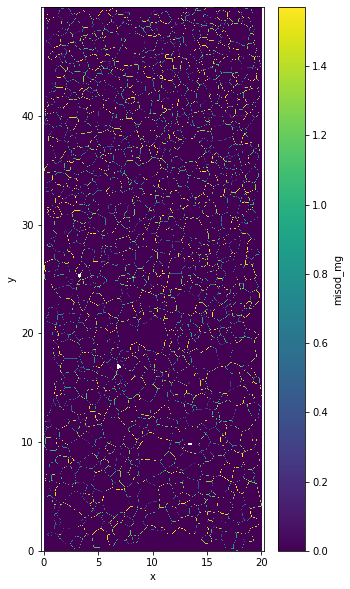

In [9]:
plt.figure(figsize=(5,10))
data.misod_mg.max(axis=2).plot.imshow()
plt.axis('equal')

### Random misorientation distribution
It is importante to compare the distribution with the random distribution. A strong texture can already have a strong impact on random distribution therefore you should always compare your distribtion with the random one. 

In [10]:
random_misod=data.orientation_mg.uvecs.mis_angle(random=True)

/home/chauvet/miniconda3/envs/basepy38/lib/python3.8/site-packages/xarray/core/computation.py:724: RuntimeWarning: invalid value encountered in remainder
  result_data = func(*input_data)


## Plot misorientation profile

You can filter the small angle value if you want

In [17]:
lim = 1 #degre

Calcul KDE for `neighboor` results.

In [ ]:
angle=np.array(data.misod_mg).flatten()
angle = angle[~np.isnan(angle)]
angle = angle[np.where(angle>lim*np.pi/180)]

kernel_a = scipy.stats.gaussian_kde(angle)
xeval_a=np.linspace(0,np.pi/2,180)
yeval_a=kernel_a(xeval_a)

Calcul KDE for `random` results.

In [22]:
rangle=random_misod[random_misod>lim*np.pi/180]
kernel_ra = scipy.stats.gaussian_kde(rangle)
xeval_ra=np.linspace(0,np.pi/2,180)
yeval_ra=kernel_ra(xeval_ra)

Plot both distribution

Text(0, 0.5, 'KDE')

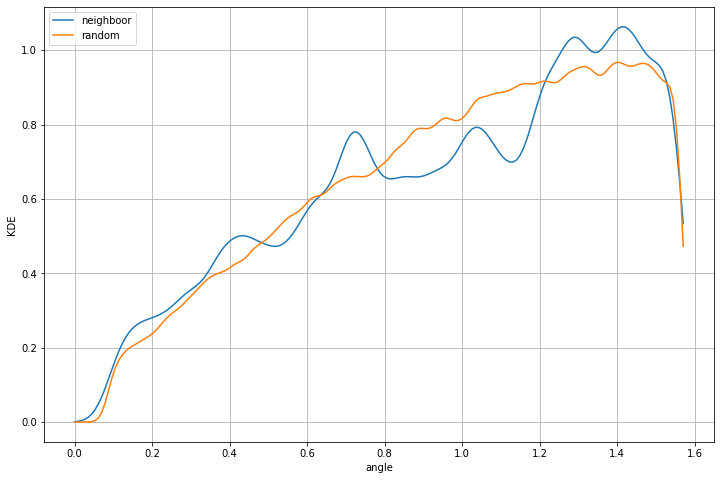

In [25]:
plt.figure(figsize=(12,8))
plt.plot(xeval_a,yeval_a,label='neighboor')
plt.plot(xeval_ra,yeval_ra,label='random')
plt.legend()
plt.grid()
plt.xlabel('angle')
plt.ylabel('KDE')